In [52]:
import xlrd
import numpy as np
import matplotlib.pylab as plt

# Donnée météorologiques RT2012

doc: https://www.rt-batiment.fr/batiments-neufs/reglementation-thermique-2012/donnees-meteorologiques.html

In [3]:
filename = './Fichiers Météo RT 2012.xls'
weather_data = xlrd.open_workbook(filename)

In [10]:
print('sheets:', ', '.join(weather_data.sheet_names()))

sheets: Descriptif, H1a, H1b, H1c, H2a, H2b, H2c, H2d, H3


In [31]:
descriptif = weather_data.sheet_by_name('Descriptif')

print('Descriptif')
print('==========')
for row in descriptif.get_rows():
    r = [r.value for r in row]
    print('\t'.join(r))

Descriptif
Zone climatique	Ville	
H1a	Trappes	
H1b	Nancy	
H1c	Macon	
H2a	Rennes	
H2b	La Rochelle	
H2c	Agen	
H2d	Carpentras	
H3	Nice	
		
Variable	Unité	Libellé
Htsmd	s.o.	Heure de début de pas de temps en UTC
te0 (°C)	°C	Température extérieure
we0 (g/kg)	g/kg	Poids d'eau au niveau de la mer
dirN (W/m²)	W/m²	Rayonnement direct normal au rayonnement solaire
diff (W/m²)	W/m²	Rayonnement diffus horizontal
Teciel (°C)	°C	Température du ciel
Vent (m/s)	m/s	Vitesse du vent
Teau (°C)	°C	Température d'eau alimentant la production d'ECS à l'altitude 0 m
Gamma (°)	°	Hauteur du soleil
Psi (°)	°	Orientation du soleil par rapport au sud (lever négatif)


In [142]:
zone_climatique = 'H1c'
datazone = weather_data.sheet_by_name(zone_climatique)

In [143]:
hours = np.array([h.value for h in datazone.col(0, start_rowx=1)])


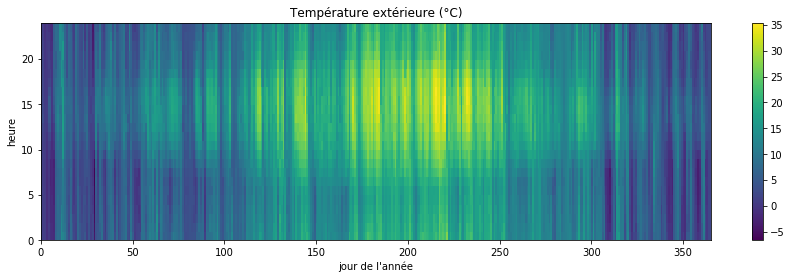

In [144]:
T_ext_grid = np.array([h.value for h in datazone.col(1, start_rowx=1)]).reshape(-1, 24).T

plt.figure(figsize=(15, 4))
plt.pcolormesh(T_ext_grid, shading='flat'); plt.colorbar();
plt.title("Température extérieure (°C)")
plt.xlabel("jour de l'année"); plt.ylabel('heure');

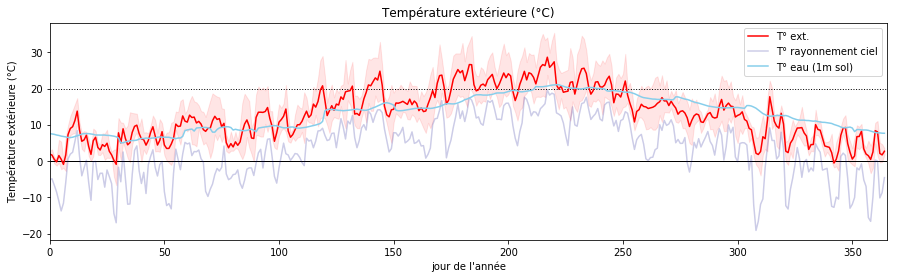

In [150]:
T_eau_grid = np.array([h.value for h in datazone.col(7, start_rowx=1)]).reshape(-1, 24).T
T_ciel_grid = np.array([h.value for h in datazone.col(5, start_rowx=1)]).reshape(-1, 24).T


plt.figure(figsize=(15, 4))
plt.axhline(y=0, linewidth=1, color='black');
plt.axhline(y=20, linewidth=1, linestyle=':', color='black');

# T_ext
plt.plot(T_ext_grid.mean(axis=0), color='r', label='T° ext.')
x = np.arange(T_ext_grid.shape[1])
plt.fill_between(x, T_ext_grid.min(axis=0), T_ext_grid.max(axis=0), color='red', alpha=0.1);

# T_ciel
#plt.plot(T_ciel_grid.max(axis=0), color='skyblue', label='T° eau (1m sol)')
plt.plot(T_ciel_grid.mean(axis=0), color='darkblue', label='T° rayonnement ciel', alpha=0.2)
#plt.plot(T_ciel_grid.min(axis=0), color='skyblue', label='T° eau (1m sol)')

# T_eau
plt.plot(T_eau_grid.mean(axis=0), color='skyblue', label='T° eau (1m sol)')

plt.xlim(0, T_ext_grid.shape[1]); plt.title("Température extérieure (°C)");
plt.ylabel("Température extérieure (°C)");plt.xlabel("jour de l'année");
plt.legend();

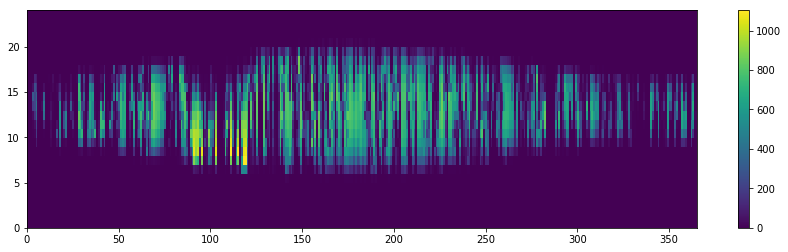

In [147]:
dirN_grid = dirN.reshape(-1, 24).T

plt.figure(figsize=(15, 4))
plt.pcolormesh(dirN_grid, shading='flat'); plt.colorbar();

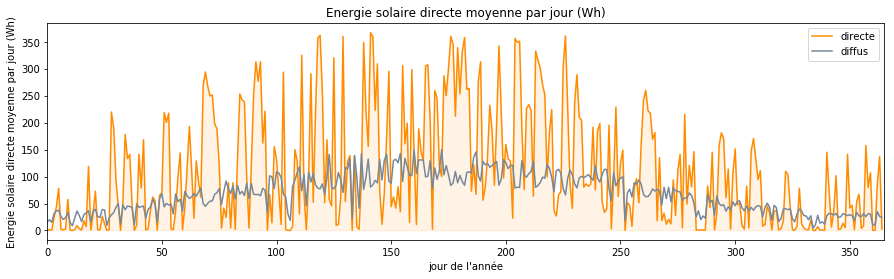

In [148]:
dirN_grid = np.array([h.value for h in datazone.col(3, start_rowx=1)]).reshape(-1, 24).T
diff_grid = np.array([h.value for h in datazone.col(4, start_rowx=1)]).reshape(-1, 24).T

plt.figure(figsize=(15, 4))
#plt.axhline(y=0, linewidth=1, color='black');
#plt.axhline(y=20, linewidth=1, linestyle=':', color='black');
x = np.arange(T_ext_grid.shape[1])

plt.plot(dirN_grid.sum(axis=0)/24, color='darkorange', label='directe')
plt.fill_between(x, np.zeros_like(x), dirN_grid.sum(axis=0)/24, color='darkorange', alpha=0.1);

plt.plot(diff_grid.sum(axis=0)/24, color='lightslategray', label='diffus')
#plt.fill_between(x, np.zeros_like(x), diff_grid.sum(axis=0)/24, color='lightslategray', alpha=0.1);

plt.legend();
plt.xlim(0, T_ext_grid.shape[1]); plt.title("Energie solaire directe moyenne par jour (Wh)");
plt.ylabel("Energie solaire directe moyenne par jour (Wh)");plt.xlabel("jour de l'année");